# Statistische Messunsicherheit

Statistische, oder zufällige, Einflüsse auf einen Messwert lassen sich durch Wiederholungen der eigentlichen Messung bestimmen. Dies nennt man auch Messreihe und bedeutet, dass $m$ Messungen für ein und denselben Messwert durchgeführt werden. Die einzelnen Messwerte $x_j$ unterscheiden sich, da der *wahre* Wert, $x_w$, immer mit einer zufälligen Abweichung, $A_j$,  versehen wird:

$$x_j = x_w + A_j$$

Bei genügend vielen Wiederholungen der Messung kann in vielen Fällen beobachtet werden, dass sich die Messwerte $x_j$ um einen zentralen Wert, $\overline x$ scharen. Die Häufigkeit, einen Messwert in einem bestimmten Abstand zu diesem zentralen Wert zu finden, $|x_j - \overline x$, ist umso kleiner, je größer der Abstand ist. Man spricht hierbei von einer Häufigkeitsverteilung der $x_j$. Die grafische Darstellung einer solchen Messreihe erfolgt in einem **Histogramm**. Diese Darstellung wird insbesondere dann häufig benutzt, wenn Messreihen mit vielen Messwerten vorliegen. An einer solchen Darstellung erkennt man häufig schon die Art der zugrundeliegenden Verteilung der Messwerten. In nachfolgendem Code-Block wird für die Messreihe die **absolute Häufigkeit** der einzelnen Werte in einer bestimmten Klasse grafisch dargestellt.

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Histogramm zeichnen - einfach erklärt (Statistikquelle)

<iframe width="200" height="113" src="https://www.youtube.com/embed/6jto_CLbtYk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

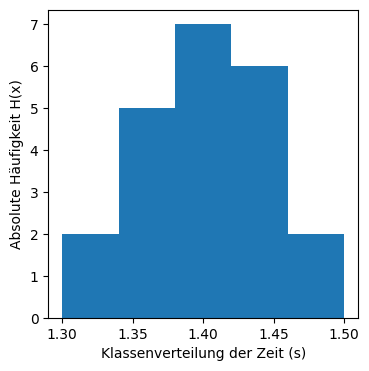

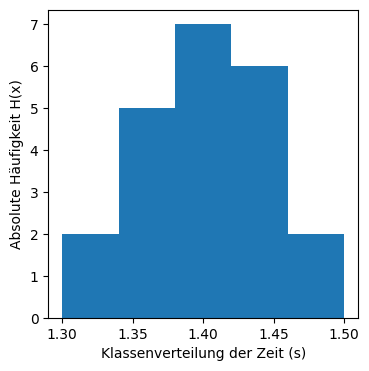

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from myst_nb import glue

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
fig, ax = plt.subplots(figsize=(4,4)) # Plot Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

t_sec = np.array([1.41, 1.35, 1.45, 1.43, 1.44, 1.43,
 1.41, 1.32, 1.43, 1.40, 1.49, 1.40,
 1.40, 1.42, 1.40, 1.38, 1.37,  1.36,
 1.37, 1.32, 1.47, 1.40])
bconts, bedges, _p = ax.hist(t_sec, bins=np.linspace(1.3, 1.5, 6))
ax.set_ylabel('Absolute Häufigkeit H(x)')
ax.set_xlabel('Klassenverteilung der Zeit (s)')

glue("boot_fig", fig, display=False)
#{glue:}`boot_fig`

```{glue:figure} boot_fig

This is a caption.
```

## Häufigkeitsdichte 

Die **relative Häufigkeit** berechnet sich aus der absoluten Häufigkeit dividiert durch die Gesamtanzahl der vorgenommenen Messungen.
Aus der Häufigkeit lässt sich auch die sogenannte **Häufigkeitsdichte** berechnen. 
Die Häufigkeitsdichte gibt bei einem Histogramm die Höhe des Rechtecks an. Mit ihr kann man den Vergleich verschiedener Klassen erst vornehmen. Anders ausgedrückt heißt dass, dass die Häufigkeitsdichte einer Klasse das Verhältnis der absoluten oder der relativen Häufigkeit einer Klasse zur entsprechenden Klassenbreite ist. Genauso lässt sich die Häufigkeitsdichte auch berechnen:

$$ h(x) = \frac{\textrm{relative oder absolute Häufigkeit}}{\textrm{obere Grenze der Klasse i} - \textrm{untere Grenze der Klasse i}} $$

Das Integral über die relative Häufigkeitsdichte ist immer auf 1 normiert, bzw auf 100% im Falle der absoluten Häufigkeitsdichte.

Im nachstehenden Code-Block wird die relative Häufigkeitsdichte für die obenstehende Messreihe geplottet und das Integral berechnet. 

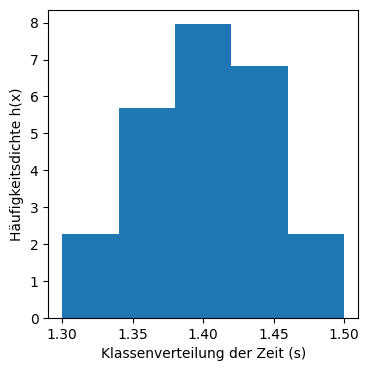

In [2]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(4,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

m = len(t_sec)

bconts, bedges, _p = plt.hist(t_sec, density=True, bins=np.linspace(1.3, 1.5, 6))
plt.ylabel('Häufigkeitsdichte h(x)')
plt.xlabel('Klassenverteilung der Zeit (s)')
plt.show()

In [3]:
print('Integral über die Häufigkeitsdichte: ',(bconts * np.diff(bedges)).sum())

Integral über die Häufigkeitsdichte:  1.0


## Zentraler Grenzwertsatz

Mit größerer mathematischer Schärfe formuliert man: Die Wahrscheinlichkeit, einen Messwert innerhalb eines kleinen Intervalls $\Delta x$ um den Wert $\overline x$ zu finden, ist $dP(X) = h(x)\cdot \Delta x$. Je größer die Stichprobe $m$ (Anzahl der Messungen), desto eher erkennt man die zugrundeliegende Verteilung, der die Messreihe unterliegt. Häufig handelt es sich in der Praxis um eine *Normalverteilung* (oder auch Gaußverteilung genannt):

$$P(x) = \frac{1}{\sigma \sqrt{2\pi}}\int_{x_1}^{x_2} \mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

Dies ist verblüffender Weise auch immer noch dann der Fall, wenn sehr viele externe Störungen (evtl. mit unterschiedlichen Verteilungsfunktionen) zu einer gemeinsamen Störgröße kombiniert werden. Die zusammengefasste Störung ist trotzdem fast immer gaußverteilt, egal wie die Einzelverteilungen aussehen (Poisson oder anderes). Dies wird auch als der **zentrale Grenzwertsatz der Wahrscheinlichkeitstheorie** bezeichnet.
> **Zentraler Grenzwertsatz der Wahrscheinlichkeitstheorie**: Der Durchschnitt einer großen Anzahl von Zufallsvariablen aus derselben Verteilung sind annäherend normalverteilt, unabhängig von der Verteilungsfunktion aus der sie herausgenommen wurden. 

## Statistische Größen

- Normalverteilte Zufallsgrößen werden also von den beiden Parametern $\overline x$ und $s$ beschrieben. Der **arithmetische Mittelwert**, der das **arithmetische Mittel** aus $m$ Beobachtungen ist:

$$\overline x = \frac{1}{m}\sum_{j=1}^m x_j$$

Für den Erwartungswert findet man in der Literatur unterschiedliche Bezeichnungen, unter anderem zum Beispiel $\overline x = E(x) = \left< x \right> = \mu$.

- Der *Erwartungswert der quadratischen Abweichung der Einzelmessungen vom Mittelwert*, die **Varianz** $\sigma^2$, 
lässt sich allgemein wie folgt schreiben:

$$\sigma^2  =  \frac{1}{m} \sum_{j=1}^m \left( x_j - \mu \right)^2$$

Der arithmetische Mittelwert zeichnet sich dadurch aus, dass für diesen Wert die Summe der Abweichungsquadrate minimal ist. Die Varianz hängt nicht von der Anzahl der Messungen ab. Die Streuung kann allein durch ein besseres Messverfahren verkleinert werden. Anschaulich ist das direkt nachvollziehbar: Die „Punktwolke“ der Messergebnisse um den Mittelwert schmiegt sich nicht enger an den Mittelwert, nur weil häufiger gemessen wurde. Ein stark streuendes Messverfahren streut durch seine Wiederholung nicht weniger. 

- Unabhängig von der zugrundeliegenden Verteilung der Messwerte kann nun ein Maß für die Abweichung definiert werden, welche als **Standardabweichung der Einzelmessungen** bekannt ist und sich aus der Quadratwurzel der Varianz berechnen lässt:

$$\sigma = \sqrt{\frac{1}{m} \sum_{j=1}^m (x_j - \mu)^2}$$

Man nehme beispielhaft die Messung einer Spannung. Die Messreihe ist im nachstehenden Bode-Block gegeben. Es wurden 15 wiederholte Messungen durchgeführt in denen 15x der Wert 1V gemessen werden sollte. Mittelwert, Standardabweichung der Einzelmessungen und Unsicherheit des Mittelwertes werden berechnet. 

Mittelwert der Messreihe:  1.40227 s
Standardabweichung der Messungen:  0.04331 s


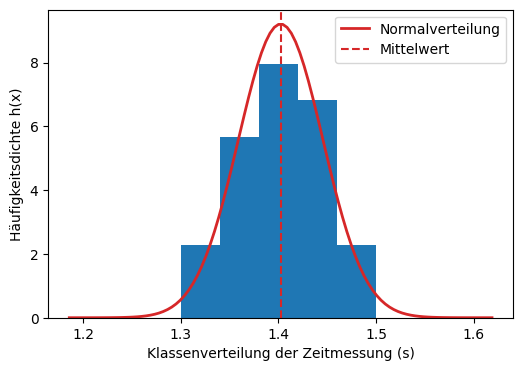

In [4]:
from scipy.stats import norm
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

n = len(t_sec)
data=np.array(t_sec)
mean=data.mean()
std=data.std(ddof=1)

print("Mittelwert der Messreihe: ", round(mean,5), 's')
print("Standardabweichung der Messungen: ", round(std,5), 's')

bconts, bedges, _p = plt.hist(t_sec, density=True, bins=np.linspace(1.3, 1.5, 6))
#xmin, xmax = plt.xlim()
xmin = mean-5*std
xmax = mean+5*std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, linewidth=2, label = 'Normalverteilung', color = "tab:red")
plt.axvline(x=mean, color="tab:red", ls='--', label='Mittelwert')
plt.ylabel('Häufigkeitsdichte h(x)')
plt.xlabel('Klassenverteilung der Zeitmessung (s)')
plt.legend()
plt.show()

## Statistische Größen bei Messreihen

- Du wirst bei deinen Messungen in der Regel weniger an der Streuung um den Mittelwert sondern mehr an der (geschätzten) Streuung der Messwerte um den (unbekannten) *wahren* Wert interessiert sein. Man schätzt diese Unsicherheit durch die empirische Varianz $s^2(x)$ der Messwerte der $x_j$ ab. Diese ist etwas größer, um den Faktor $m/(m − 1)$:

$$s^2 = \frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2$$

- Die empirische Standardabweichung $s(x)$ der Messwerte ist die Wurzel aus der empirischen Varianz:

$$s = \sqrt{\frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2}$$

> Welche der Größen s oder $\sigma$ du sinnvoll verwendest, hängt vom Einzelfall ab − wichtig ist, dass du dazu schreibst, welcher Wert verwendet wurde, damit die Leser die Argumentation nachvollziehen kann. Generell sollte $s$ insbesondere bei wenigen Messwerten verwendet werden, denn mit $s$ ist auch der etwas seltsame Fall einer Einzelmessung abgedeckt: für m = 1 wäre $\sigma$ = 0, $s$ dagegen nicht definiert. Die zweite Aussage ist, bezogen auf die statistische Interpretation, sicher sinnvoller. Deshalb wird in diesem Skript $s$ verwendet.

## Messunsicherheit des Mittelwertes 

Auch die Messunsicherheit des Mittelwertes selbst, $u(\overline x)$, kann natürlich kritisch bewertet werden: Wie wirkt sich die zu erwartende Messunsicherheit der einzelnen Messwerte $u(x)$ auf die Unsicherheit des Mittelwerts $u(\overline x)$ der Messreihe aus?
Laut *Grenzwertsatz* sind folglich auch die Mittelwerte (sollte man mehrere Stichproben aufnehmen) normalverteilt. Das heißt aus den verschiedenen Mittelwerten von $k$ Stichproben könnte theoretisch wieder ein Mitelwert berechnet werden. Außerdem kann analog die Standardabweichung der Mittelwerte berechnet werden:

$$s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x}  = \sqrt{\frac{1}{m(m-1)} \sum_{j=1}^m (x_j - \overline x)^2}$$

Der Grenzwertsatz sagt aus, wenn man eine ausreichend große Stichprobe aus einer *Grundgesamtheit* nimmt, so wird der **Mittelwert der Stichprobe** näherungsweise dem **Mittelwert der Grundgesamtheit** entsprechen und sich somit dem *wahren* Wert annähern.  Die **Unsicherheit des Mittelwertes** einer Messreihe ist gegenüber der Abweichung der Einzelmessungen um den Faktor $\sqrt{m}$ reduziert. Der Grund dafür ist, dass sich statistisch ermittelte Unsicherheiten teilweise herausmitteln. 

Bei einer großen Anzahl Messungen (>30) liegen etwa 68% der **Einzel**-Messungen im Intervall $\pm s(x)$ **um den Mittelwert** der Messreihe herum. Würden man den wahren Wert kennen, könnte man weiter herausfinden, dass etwa 68% der **Mittelwerte** im Intervall $\pm s(\overline x)$ **um den wahren** Wert lägen.

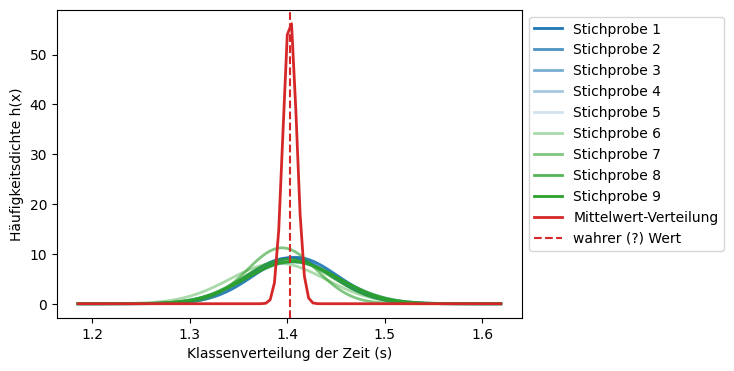

In [5]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

n = len(t_sec)
data=np.array(t_sec)
mean=data.mean()
std=data.std(ddof=1)

x_volt_2 = np.random.normal(mean, std, n)
x_volt_3 = np.random.normal(mean, std, n)
x_volt_4 = np.random.normal(mean, std, n)
x_volt_5 = np.random.normal(mean, std, n)
x_volt_6 = np.random.normal(mean, std, n)
x_volt_7 = np.random.normal(mean, std, n)
x_volt_8 = np.random.normal(mean, std, n)
x_volt_9 = np.random.normal(mean, std, n)
data_2=np.array(x_volt_2)
data_3=np.array(x_volt_3)
data_4=np.array(x_volt_4)
data_5=np.array(x_volt_5)
data_6=np.array(x_volt_6)
data_7=np.array(x_volt_7)
data_8=np.array(x_volt_8)
data_9=np.array(x_volt_9)

means = [data.mean(), data_2.mean(), data_3.mean(),data_4.mean(),data_5.mean(),data_6.mean(),data_7.mean(),data_8.mean(),data_9.mean(),]
data_means = np.array(means)
#bconts, bedges, _p = plt.hist(x_volt, density=True, bins=np.linspace(0.95, 1.05, 6), label = "Messwerte, Sichprobe 1")
#xmin, xmax = plt.xlim()
xmin = mean-5*std
xmax = mean+5*std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, data.mean(), data.std(ddof=1))
p_2 = norm.pdf(x, data_2.mean(), data_2.std(ddof=1))
p_3 = norm.pdf(x, data_3.mean(), data_3.std(ddof=1))
p_4 = norm.pdf(x, data_4.mean(), data_4.std(ddof=1))
p_5 = norm.pdf(x, data_5.mean(), data_5.std(ddof=1))
p_6 = norm.pdf(x, data_6.mean(), data_6.std(ddof=1))
p_7 = norm.pdf(x, data_7.mean(), data_7.std(ddof=1))
p_8 = norm.pdf(x, data_8.mean(), data_8.std(ddof=1))
p_9 = norm.pdf(x, data_9.mean(), data_9.std(ddof=1))
p_means = norm.pdf(x, data_means.mean(), data_means.std(ddof=1))
plt.plot(x, p, linewidth=2, label = 'Stichprobe 1', color="tab:blue", alpha = 1.0)
plt.plot(x, p_2, linewidth=2, label = 'Stichprobe 2', color="tab:blue", alpha = 0.8)
plt.plot(x, p_2, linewidth=2, label = 'Stichprobe 3', color="tab:blue", alpha = 0.6)
plt.plot(x, p_3, linewidth=2, label = 'Stichprobe 4', color="tab:blue", alpha = 0.4)
plt.plot(x, p_4, linewidth=2, label = 'Stichprobe 5', color="tab:blue", alpha = 0.2)
plt.plot(x, p_5, linewidth=2, label = 'Stichprobe 6', color="tab:green", alpha = 0.4)
plt.plot(x, p_6, linewidth=2, label = 'Stichprobe 7', color="tab:green", alpha = 0.6)
plt.plot(x, p_7, linewidth=2, label = 'Stichprobe 8', color="tab:green", alpha = 0.8)
plt.plot(x, p_8, linewidth=2, label = 'Stichprobe 9', color="tab:green", alpha = 1.0)
plt.plot(x, p_means, linewidth=2, label = 'Mittelwert-Verteilung', color="tab:red", alpha = 1.0)

plt.axvline(x=data_means.mean(), color="tab:red", ls='--', label='wahrer (?) Wert')
plt.ylabel('Häufigkeitsdichte h(x)')
plt.xlabel('Klassenverteilung der Zeit (s)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Vertrauensintervalle

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Vertrauensintervall für Erwartungswert berechnen - Beispiel einfach erklärt (Mathe - simpleclub)

<iframe width="200" height="113" src="https://www.youtube.com/embed/3-j37bBJlMU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Sigmaregeln - Wahrscheinlichkeiten in der Normalverteilung (Mathe - simpleclub)

<iframe width="200" height="113" src="https://www.youtube.com/embed/OmmODKdYLSI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Wir haben eben bereits erwähnt, dass 68% der Messwerte innerhalb des Intervalls $\pm s(x)$ liegen. Bei bekannter  Wahrscheinlichkeitsverteilung $h(x)$ der Messwerte $x$ um den Mittelwert $\overline x$, lässt sich die Wahrscheinlichkeit dafür berechnen, einen Messwert im Intervall $[x_1, x_2]$ um den Mittelwert zu finden. Wir nehmen im Folgenden eine Normalverteilung, mit Standardabweichung $\sigma$, der Messwerte an, dann ist die Wahrscheinlichkeit für
- einen Messwert $x\pm dx$: 

$$h(x)dx = \frac{1}{\sigma \sqrt{2\pi}}\mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

- irgendeinen Messwerte zwischen $\pm \infty:$ 

$$P(-\infty < x < \infty) = \int_{-\infty}^\infty h(x)dx = 1$$

- einen Messwert im Intervall $[x_1, x_2]$: 

$$P(x_1 < x < x_2) = \int_{x_1}^{x_2} h(x)dx =  \frac{1}{\sigma \sqrt{2\pi}}\int_{x_1}^{x_2} \mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

Das hier auftretende Integral ist nicht elementar berechenbar und man findet statt dessen Tabellen, die man hierfür benutzen kann. Mit $x_1 = \mu - r\cdot \sigma$ und $x_2 = \mu + r\cdot \sigma$ findet man die Wahrscheinlichkeit $P(\mu-r\cdot\sigma \leq x \leq \mu+r\cdot\sigma)$ dafür, dass der Messwert innerhalb einer $t\cdot\sigma$-Umgebung um den Mittelwert liegt. 
Bei einer echten Normalverteilung gilt folgendes:
* 68,3% aller Messwerte liegen im Bereich $\pm \sigma$
* 95,5% aller Messwerte liegen im Bereich $\pm 2\sigma$
* 99,7% aller Messwerte liegen im Bereich $\pm 3\sigma$
* Im Abstand $\pm \sigma$ sind die Wendestellen
* Die Normalverteilung reicht von $-\infty$ bis $+\infty$ 

Durch die Intervallgrenzen dieser Verteilung werden Güteklassen von Messeinrichtungen definiert. Andersherum können auch Anforderungen an Messgeräte gestellt werden: Die Anforderungen werden umso höher, je höher die Wahrscheinlichkeit sein soll, dass sich die Messwerte dem *richtigen* Wert annähern. 
Der Messtechniker kann somit mit der gegebenen Wahrscheinlichkeit abschätzen, ob ermittelte Messwerte innerhalb einer durch Fertigungsunterlagen zugelassenen Toleranz für die Maße eines Werkstücks liegen. Übliche Werte für Invervallgrenzen (meist symmetrisch, also Abweichungen sowohl nach unten als auch nach oben im gleichen Maße) und die zugehörigen Wahrscheinlichkeiten sind der nachfolgenden Tabelle angegeben: 

![Bild](pictures/tab_norm_grenzen.png)

Als Messtechniker gehen wir immer daher davon aus, dass innerhalb $\pm 3\sigma$ alle Messwerte liegen. Auf dieser Basis wird entsprechend auch die Messabweichung berechnet, also A = $\pm 3\sigma$.

Das **Endergebnis** der oben dargestellten Messreihe von $m = 15$ Messwerten wird in der Regel wiefolgt angegeben. Als Messwert wird nicht das Ergebnis einer Einzelmessung angegeben, sondern stets der Mittelwert der Messreihe inkl. seiner Unsicherheit:

$$ s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x} $$

Der Mittelwert ist der beste Schätzwert, den wir für den *wahren* Wert ermitteln können. Die Angabe des Messergebnisses erfolgt also wiefolgt:

$$x = \overline x \pm r \cdot u_{\overline x}$$

wobei $r$ ein Maß für den **Vertrauensbereich $v$** ist:

$$v = \pm \frac{r}{\sqrt{m}}\cdot s = u_v$$

Der Vertrauensbereich beschreibt die Aufspreizung des Mittelwertes einer Messreihe zu einem Vertrauensband, das umso breiter ist, je weniger Messwerte zur Auswertung zur Verfügung stehen und je größer das geforderte Vertrauensniveau ist. 
Der Vertrauensbereich gilt als Qualitätsmaß für die Genauigkeit einer durchgeführten Messung. 
Für $r=1$ wählen wir also die $\pm 1\sigma$-Umgebung, in der 68% der Messwerte liegen. Für $r = 2$, also die $\pm 2\sigma$-Umgebung, werden schon 95% aller Messwerte in diesem Bereich erwartet. Die Messabweichung ist dadurch erhöht, das Vertrauen allerdings auch.

In [6]:
print("Mittelwert der Messreihe: ", round(mean,3), 's')
print("Standardabweichung der Messungen: ", round(std,3), 's')
print("Abweichung des Mittelwertes: ", round(std/np.sqrt(m),3), 's')
print('----------------------------------------------------------------')
print("Messergebnis (95%): (", round(mean,3), '+-',round(2*std/np.sqrt(m),3),') s')

Mittelwert der Messreihe:  1.402 s
Standardabweichung der Messungen:  0.043 s
Abweichung des Mittelwertes:  0.009 s
----------------------------------------------------------------
Messergebnis (95%): ( 1.402 +- 0.018 ) s


## Korrektur bei kleinen Stichproben: Student-t

Ist die Zahl der Messwerte nur klein ($m \leq 25$) werden die aus der Normalverteilung berechneten Parameter ziemlich unsicher. Anfang des 20. Jh. veröffentlichte WILLIAM SEALY GOSSET unter dem Pseudonym „Student“ eine Verteilungsfunktion, die eine zuverlässigere Parameterschätzung auch für kleine Stichprobengrößen erlaubt. Für die Messwertanalyse ist folgender Teilaspekt von Bedeutung: Aus der Zahl $m$ der Messwerte und einem vorgegebenen Vertrauensbereich berechnen Sie einen Faktor $t(s=m-1, p=1-\alpha/2)$, der die Unsicherheitsintervalle aus der Normalverteilung korrigiert. 
Die unten stehende Quantil-Tabelle zeigt die zugehörigen Werte von $t$ in Abhängigkeit von der Messwertanzahl, und dem gewählten Vertrauensniveau, dass die geforderte statistische Sicherheit beschreibt:

:::{admonition} Tabelle der $s-p$-Quantile
:class: tip, dropdown
![Bild](pictures/student-t.png)
:::

Die Interpretation der Quantil-Tabelle der Student-t Verteilung kann verwirrend sein. Statt der Anzahl der Messwerte $m$ wird die Anzahl der Freiheitsgrade $s = m-1$ angegeben. Und statt des zweiseitigen Vertrauensbereich $P = 1-\alpha$ wird der halbseitige Vertrauensbereich $p = 1-\alpha/2$ gewählt. Beide *Quantile* können aber über die eben angegebenen Formel einfach bestimmt werden.

Aus der empirischen Standardabweichung des Mittelwertes $s(\overline x)$ berechnet man beispielsweise:

$$u(\overline x) = t(s,p) \cdot s(\overline x) = t(s,p) \cdot \frac{s(x)}{\sqrt{m}}$$

Desweiteren können Vertrauensbereiche unterschiedlicher Wahrscheinlichkeiten ineinander umgerechnet werden:

$$\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$$

Hierbei ist $\alpha$ das Signifikanzniveau, also die Irrtumswahrscheinlichkeit $\alpha = 1-P$, wobei $P$ die Wahrscheinlichkeit bzw. die geforderte statistische Sicherheit ist.


:::{admonition} Beispiel zur Berechnung der Messabweichung einer Messreihe mittels Student-t Verteilung
:class: tip, dropdown

Für die Spannung-Messreihe aus dem oben aufgeführten Beispiel waren folgende Parameter gegeben:
* Anzahl der Messwerte $m=22$
* Mittelwert: $\overline x = 1,04\,\mathrm{s}$
* Standardabweichung des Mittelwertes: $u_{\overline x} = 0,009\,\mathrm s$

Oben hatten wir das Ergebnis, in dem 95% der Messwerte zu finden sind, wiefolgt angegeben gehabt, in dem wir die Gaußverteilung und den zugehörigen $2\sigma$-Vertrauensbereich benutzt haben:

$$x = (1,04 \pm 2\cdot 0,009)\,\mathrm s = (1,004 \pm 0,018)\,\mathrm s \quad (95\%)$$

In Anbetracht der sehr kleinen Stichprobe von lediglich $m=22$ Messwerten sollte jedoch die Student-t Verteilung hinzugezogen werden und der Vertrauensbereich für 95% korrigiert werden. Es gilt also:
> $P = 1-\alpha = 0,95$. Daraus folgt:

> $\Rightarrow \alpha = 1-P = 1-0,95 = 0,05$

> $\Rightarrow \alpha/2 = 0,025$

> $\Rightarrow p = 1-\alpha/2 = 1-0,025 = 0,975$

Für die Berechnung des s-Quantils gilt:

> $s = m-1 = 22-1 = 21$

Der $t$-Wert des korrigierten Vertrauensbereichs wird aus der Tabelle abgelesen:

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{21; 0,975} = 2,080$$

$$x = (1,04 \pm 2,080\cdot 0,009)\,\mathrm s = (1,004 \pm 0,0187)\,\mathrm s \quad (95\% \textrm{ t-Verteilung})$$

Der Unterschied zum Vertrauensbereich, der aus der Normalverteilung hervorgeht, ist ein über 4% höherer Fehler.
Die Umrechnung dieses Vertrauensbereich in einen Vertrauensbereich mit einem anderen Vertrauenzniveau, z.B. von 95% zu 99%, wird im folgenden anhand dieses Beispiels verdeutlicht. Die Ergebnisse für 95% sind bekannt. Nun muss das Quantil für 99% (also $\alpha = $1%) bestimmt werden. Analog werden die $s = m-1 = 21$ und $p = 1-\alpha/2 = 1-0,005 = 0,995$ Quantile bestimmt und der $t$-Wert aus der Tabelle abgelesen: 

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{21; 0,995} = 2,831$$

Hieraus kann nun nach obiger Gleichung der Vertrauensbereich für 99% berechnet werden:

> $\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$

> $\Rightarrow u_{\alpha 2} = u_{\alpha 1} \cdot \frac{t_{m-1; 1-\frac{\alpha_2}{2}}}{t_{m-1; 1-\frac{\alpha_1}{2}}} = 0,0187\,\mathrm s \cdot 2,831 / 2,080 = 0,025\,\mathrm s$

Die Angabe des Messergebnisses lautet somit:

$$x = (1,04 \pm 0,025)\,\mathrm s \quad (99\%)$$

## Normierte Normalverteilung 

Jede Normalverteilung kann in eine normierte Gaußverteilung transformiert werden. Der Übergang erfolgt mit einer Transformation, die die Messwerte normiert. Dadurch können die Verteilungen verschiedener Messwerte miteinander verglichen werden, unabhängig von deren physikalischen Einheit. 

![Bild](pictures/normierte_gauss.png)

Die Differenz $x-\mu$ wird auf die Standardabweichung $\sigma$ normiert. Dadurch erhält man folgende Funktion für $\mu = 0$ und $\sigma = 1$ und $-1$:

$$h(z) = \frac{1}{\sqrt{2\pi}}\mathrm e^{-\frac{z^2}{2 ^2}} $$

Der Flächeninhalt unterhalb dieser Verteilungsfunktion ist wieder auf 100% normiert, wenn von $\pm \infty$ integriert wird. Die Maximale Amplitude ist jetzt $1/\sqrt{2 \pi}$. Die $z$-Achse (vorher Messwerte $x$) ist jetzt dimensionslos (einheitenlos). Somit können mit normierten Gaußverteilungen verschiedene physikalische Größen auch von verschiedenen Messgeräten bezüglich ihrer Streuung verglichen werden. 
Die Tabelle kann im folgenden Block angezeigt werden und gibt die Wahrscheinlichkeiten für verschiedene $z-$Werte. Die Spalten geben die erste Nachkommastelle von $z$ an, die Zeilen die zweite.

:::{admonition} Tabelle der normierten Wahrscheinlichkeiten in Abhängigkeit von $z$
:class: tip, dropdown
![Bild](pictures/normalverteilung_tabelle.png)
:::

Als wichtigste Erkenntnis gilt es festzuhalten, dass zu jeder Aussage zu zufälligen Abweichungen die zugehörige Wahrscheinlichkeit für das Zutreffen dieser Aussage zwingend erforderlich ist. Dies sollte immer mit angegeben werden, wenn die Messabweichung angegeben wird. 
Messwertangaben ohne Aussage zur Wahrscheinlichkeit bezüglich der zufälligen Abweichungen sind in der betrieblichen Praxis nicht brauchbar!

### Wahrscheinlichkeit für das Zutreffen eines Ereignisses mittels Gauß-Test 

Es soll im Folgenden ein Messsystem einer Abfüllanlage überprüft werden, die Flaschen sind jeweils mit 0,7 l Saftgetränk befüllt.
Aus Kalibrierungen ist bekannt, dass die Messwerte des Messsystems der Abfüllanlage normalverteilt mit einem Erwartungswert $\mu$ = 0,7 l und Standardabweichung $\sigma$ = 5 ml sind. 
Wie groß ist die Wahrscheinlichkeit, dass die Saftflaschen mit einen Inhalt zwischen 0,69 l und 0,71 l befüllt werden?

Lösung: 
* Obere und untere Grenze werden in den $z$-Wert umgerechnet:

> $z_o = \frac{x-\mu}{\sigma} = \frac{(0,69-0,7)\,\mathrm l}{0,005\,\mathrm l} = -2$

> $z_u = \frac{x-\mu}{\sigma} = \frac{(0,71-0,7)\,\mathrm l}{0,005\,\mathrm l} = 2$

* Aus der Tabelle werden die Werte für $z = 2,00$ abgelesen:

> $\phi(2) = 0.97725$ (Wahrscheinlichkeit dafür, dass der Messwert zwischen 0 l und 0,71 l liegt)

> $\phi(-2) = 1 - \phi(2) =  1-0,97725 = 0,02275$ (Wahrscheinlichkeit dafür, dass der Messwert NICHT zwischen 0 l und 0,69 l liegt)

* Berechnung der Wahrscheinlichkeit, dass die Saftflaschen mit einem Inhalt zwischen 0,69 l und 0,71 l befüllt werden:

> $\phi(2) - \phi(-2) = 0,97725-0,02275 = 0,9545$

Mit einer Wahrscheinlichkeit von 95,45 % werden die Flaschen in der Abfüllanlage mit einem Inhalt von 0,69 l – 0,71 l befüllt. Dies entspricht auch genau der Wahrscheinlichkeit der $2\sigma$-Umgebung (siehe vorheriges Kapitel), was für $z = \pm 2$ natürlich auch so sein sollte. 


## Zusammenfassung zufälliger Unsicherheiten

![Bild](pictures/zusammenfassung_zufaellig.png)